In [95]:
!pip install visualkeras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras
from PIL import ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Do not forget to connect to GPU runtime before training**

In [96]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

In [97]:
X_train.shape

(35000, 32, 32, 3)

In [98]:
# Normalizing the values between -1 and 1
X_train  = X_train/255
X_test = X_test/255

In [99]:
# Create an ImageDataGenerator object with given augmentation settings(just an instance)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Random rotation within the range of [-20, 20] degrees
    width_shift_range=0.1,  # Random horizontal shift within the range of [-0.1, 0.1] of the total width
    height_shift_range=0.1, # Random vertical shift within the range of [-0.1, 0.1] of the total height
    shear_range=0.2,        # Random shearing transformations within the range of [-0.2, 0.2]
    zoom_range=0.2,         # Random zoom within the range of [0.8, 1.2]
    horizontal_flip=True,   # Randomly flip inputs horizontally
    fill_mode='nearest' ,    # Fill any newly created pixels with the nearest available pixel value
    validation_split=0.2  # Split 20% of the data for validation
)

# Apply data augmentation to the training data
augmented_images = datagen.flow(X_train, Y_train)
print((augmented_images))
# creating the validation data
validation_data = datagen.flow(X_train, Y_train, subset='validation')
print((validation_data))

## **`This is an Open assignment with minimum instructions`**
You are allowed to search all over the web--> find any articles or implement them--> try your experiments

> **---> create the model**\
**---> tune the hyperparameters like learning_rate, filter/kernel size**\
**---> optimize the result**


In [100]:
#@title **IMPORTANT ANNOUNCEMENT**
"""
Now with this much freedom, you can do anything
So make sure you understand what you do and after the end of this assignment
 you will have explain all the code you tried in a viva exam
 this will be the mid term evaluation.
"""

'\nNow with this much freedom, you can do anything\nSo make sure you understand what you do and after the end of this assignment\n you will have explain all the code you tried in a viva exam\n this will be the mid term evaluation.\n'

## **YOUR EFFORTS WILL COUNT MORE THE RESULTS YOU GET**
> **So make sure all the time you spent on this notebook should be visible from the notebook**

In [101]:
"""
Question: What is Batch Normalization? Why is it used for? How does it fix the
problem it is used for? [ Answer in atleast 300 words]
<cite your sources>

Answer: Batch Normalisation is a method to reduce overfitting. It is done by normalising the data to a common scale to make it faster to process the test data. It is faster because then the model works with similar values of data. The mean is subtracted from the data value, and divided by standard deviation and a smoothing term to normalise the data point. In the final operation, the re-scaling and offsetting of the input takes place. Here two components of the BN algorithm come into the picture, γ(gamma) and β (beta). These parameters are used for re-scaling (γ) and shifting(β) of the vector containing values from the previous operations. It solveas the problem of Internal Covariate Shift. Let us say we have a dataset of dogs, in which all dogs are white. If we take dogs which are of a different colour, say brown, it will shift it to a normalised value to overlook it. Though, a study by MIT shows that BN does not solve the problem of Internal Covariate Shift. It was shown that it was not a contributing factor for the performance of the BN. It helps in keeping the model stable, which increases efficiency. Due to the stability of the model, it is not affected by the initial weights put. One disadvantage of this is that we can’t use drop out with this, because if we randomly remove nodes, then it can mess up with the mean and standard deviation, creating it to be very noisy.
Sources :
https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/
https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/#:~:text=Using%20batch%20normalization%20makes%20the,speed%20up%20the%20learning%20process.&text=ill%20side%20effects-,%E2%80%94%20Batch%20Normalization%3A%20Accelerating%20Deep%20Network%20Training%20by,Reducing%20Internal%20Covariate%20Shift%2C%202015.







"""

'\nQuestion: What is Batch Normalization? Why is it used for? How does it fix the \nproblem it is used for? [ Answer in atleast 300 words]\n<cite your sources>\n\nAnswer: Batch Normalisation is a method to reduce overfitting. It is done by normalising the data to a common scale to make it faster to process the test data. It is faster because then the model works with similar values of data. The mean is subtracted from the data value, and divided by standard deviation and a smoothing term to normalise the data point. In the final operation, the re-scaling and offsetting of the input takes place. Here two components of the BN algorithm come into the picture, γ(gamma) and β (beta). These parameters are used for re-scaling (γ) and shifting(β) of the vector containing values from the previous operations. It solveas the problem of Internal Covariate Shift. Let us say we have a dataset of dogs, in which all dogs are white. If we take dogs which are of a different colour, say brown, it will sh

In [102]:
"""
Tutorial: https://www.tensorflow.org/tutorials/images/classification

Above tutorial does exactly the same job
But I will zero marks for exact same model used in the tutorial

You need experiment with different layers and all those
experiments should be visible by your notebooks
"""

'\nTutorial: https://www.tensorflow.org/tutorials/images/classification\n\nAbove tutorial does exactly the same job\nBut I will zero marks for exact same model used in the tutorial\n\nYou need experiment with different layers and all those\nexperiments should be visible by your notebooks\n'

In [103]:
# model initialization
model = tf.keras.Sequential()

# Intermediate layers

model.add(tf.keras.layers.Conv2D(20, (2, 2), input_shape=(32, 32, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(60, (2, 2), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
















# final layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [104]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 31, 31, 20)        260       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 60)        4860      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 60)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 2940)              0         
                                                                 
 dense_10 (Dense)            (None, 10)              

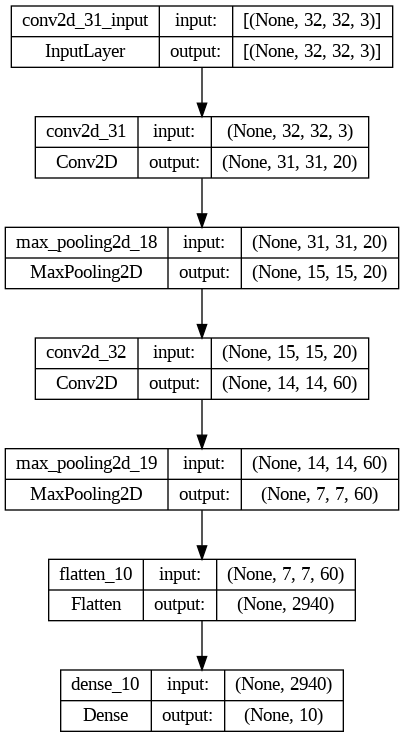

In [105]:
#@title Visualization

# just run this cell as it is
tf.keras.utils.plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

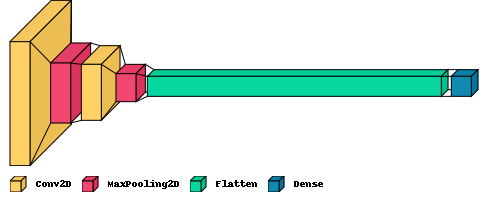

In [106]:
# just run this cell as it is
visualkeras.layered_view(model, legend=True)

In [107]:
"""
In the last part of the assignment
try experimenting with learning rate.
May be decreasing the lr might had help?
"""

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [108]:
# This is another way of dealing with the generated data
# both X_train and Y_train are inside the augmented image

history = model.fit(augmented_images, epochs=10,validation_data = validation_data)

Epoch 1/10
1094/1094 [==============================] - 26s 23ms/step - loss: 2.2941 - accuracy: 0.5182 - val_loss: 2.2819 - val_accuracy: 0.4663
Epoch 2/10
1094/1094 [==============================] - 25s 23ms/step - loss: 2.2674 - accuracy: 0.3831 - val_loss: 2.2534 - val_accuracy: 0.2274
Epoch 3/10
1094/1094 [==============================] - 25s 23ms/step - loss: 2.2294 - accuracy: 0.2216 - val_loss: 2.2081 - val_accuracy: 0.1850
Epoch 4/10
1094/1094 [==============================] - 25s 23ms/step - loss: 2.1775 - accuracy: 0.1703 - val_loss: 2.1536 - val_accuracy: 0.1680
Epoch 5/10
1094/1094 [==============================] - 26s 24ms/step - loss: 2.1167 - accuracy: 0.1534 - val_loss: 2.0936 - val_accuracy: 0.1183
Epoch 6/10
1094/1094 [==============================] - 25s 23ms/step - loss: 2.0591 - accuracy: 0.1368 - val_loss: 2.0493 - val_accuracy: 0.1180
Epoch 7/10
1094/1094 [==============================] - 25s 23ms/step - loss: 2.0220 - accuracy: 0.1316 - val_loss: 2.0164 -

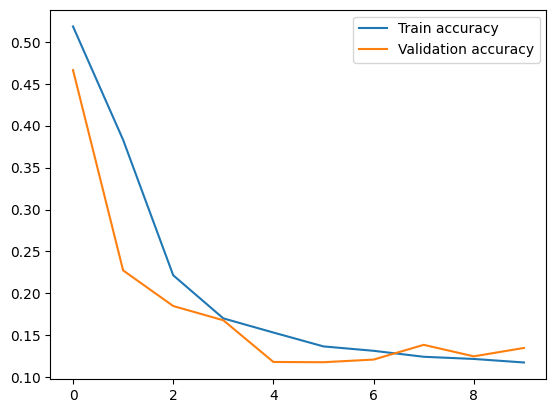

In [109]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [110]:
model.evaluate(X_test,Y_test)

469/469 [==============================] - 1s 2ms/step - loss: 1.9175 - accuracy: 0.1267


[1.9175455570220947, 0.12673333287239075]

## **TRY DIFFERENT MODELS AND COMPARE THE RESULTS**

In [111]:
# model initialization
model1 = tf.keras.Sequential()

# Intermediate layers

model1.add(tf.keras.layers.Conv2D(20, (2, 2), input_shape=(32, 32, 3), activation = 'relu'))
model1.add(tf.keras.layers.AveragePooling2D((2, 2)))
model1.add(tf.keras.layers.BatchNormalization(momentum = 0.99, epsilon = 0.001))
model1.add(tf.keras.layers.Conv2D(60, (2, 2), activation = 'relu'))
model1.add(tf.keras.layers.AveragePooling2D((2, 2)))
model1.add(tf.keras.layers.BatchNormalization(momentum = 0.99, epsilon = 0.001))
model1.add(tf.keras.layers.Conv2D(180, (3, 3), activation = 'relu'))
model1.add(tf.keras.layers.AveragePooling2D((3, 3)))
model1.add(tf.keras.layers.BatchNormalization(momentum = 0.99, epsilon = 0.001))
model1.add(tf.keras.layers.Flatten())










# final layer

model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [112]:
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [91]:
history1 = model1.fit(augmented_images, validation_data = validation_data, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1094/1094 [==============================] - 30s 25ms/step - loss: 1.7891 - accuracy: 0.0937 - val_loss: 1.6209 - val_accuracy: 0.1079
Epoch 2/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.5933 - accuracy: 0.0969 - val_loss: 1.5296 - val_accuracy: 0.0943
Epoch 3/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.5224 - accuracy: 0.0959 - val_loss: 1.4865 - val_accuracy: 0.0560
Epoch 4/10
1094/1094 [==============================] - 28s 26ms/step - loss: 1.4716 - accuracy: 0.0957 - val_loss: 1.4157 - val_accuracy: 0.0917
Epoch 5/10
1094/1094 [==============================] - 27s 25ms/step - loss: 1.4350 - accuracy: 0.0967 - val_loss: 1.3871 - val_accuracy: 0.0654
Epoch 6/10
1094/1094 [==============================] - 28s 25ms/step - loss: 1.4043 - accuracy: 0.0959 - val_loss: 1.3572 - val_accuracy: 0.1491
Epoch 7/10
1094/1094 [==============================] - 30s 27ms/step - loss: 1.3794 - accuracy: 0.0957 - val_loss: 1.3274 - val_accura

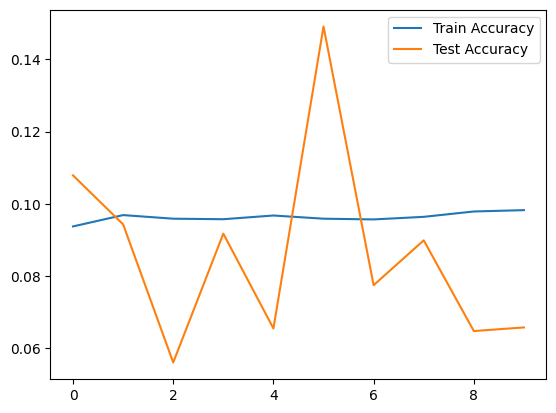

In [92]:
plt.plot(history1.history["accuracy"])
plt.plot(history1.history["val_accuracy"])
plt.legend(["Train Accuracy", "Test Accuracy"])
plt.show()

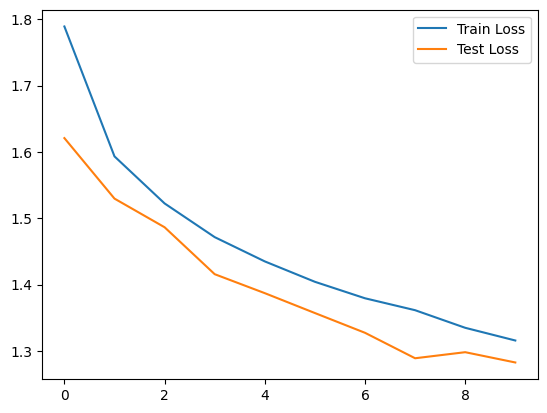

In [93]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.legend(["Train Loss", "Test Loss"])
plt.show()

In [94]:
model1.evaluate(X_test, Y_test)

469/469 [==============================] - 2s 3ms/step - loss: 1.1834 - accuracy: 0.0807


[1.1833869218826294, 0.0806666687130928]